# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
countries = pd.read_csv("countries.csv")

In [5]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.

#colunas a serem corrigidas
colunas = ['Pop_density','Coastline_ratio','Net_migration', 'Infant_mortality', 'Literacy', 'Phones_per_1000',
           'Arable', 'Crops', 'Other', 'Birthrate', 'Deathrate', 'Agriculture', 'Climate', 'Industry', 'Service']

for i in colunas:
    countries[i] = countries[i].str.replace(',', '.').astype('float64')


In [7]:
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
#Removendo espaçoes nas strings
countries['Country'] = countries['Country'].str.strip() 
countries['Region'] = countries['Region'].str.strip() 

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [9]:
def q1(df):
    return sorted(list(df['Region'].unique()))

In [10]:
q1(countries)

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [11]:
from sklearn.preprocessing import KBinsDiscretizer  
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")

In [12]:
def q2(df):
    discretizer.fit((np.array(df['Pop_density'])).reshape(-1,1))
    Pop_density_bins = discretizer.transform((np.array(df['Pop_density'])).reshape(-1,1))
    return int(sum(Pop_density_bins[:, 0] == 9))

In [13]:
q2(countries)

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [14]:
#a função retorna a soma dos valores de um array formado pela quantidade de colunas geradas ao se chamar a função
#get_dummies nas colunas "Region" e "Climate". No caso da coluna "Climate", foi utilizado o parâmetro 
# "dummy_na=True" para que não sejam ignorados os valores nulos. Desta forma, será criada uma nova coluna para os
#valores nulos encontrados em "Climate", ou seja, uma variável chamada "Climate_nan". Isto foi feito pois não
#havia informação sobre o que fazer com os valores nulos...

def q3(df):
    return sum([len((pd.get_dummies(df['Region'])).columns),
                len((pd.get_dummies(df['Climate'],dummy_na=True)).columns)])

In [15]:
q3(countries)

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha (OS NULOS) das variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [18]:
def q4(countries):
    # Seleciona o nome das colunas numéricas
    colunas = countries.select_dtypes(include=['float64','int64']).columns
    
    # Cria o pipeline
    q4_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())])
    
    # Fita o pipeline com os dados de treino
    countries_pipeline = q4_pipeline.fit_transform(countries[colunas])

    # Transforma a variável de teste ('test_country') em dataframe. O '.T' é utilizado para gerar uma matriz
    # transposta com os dados, visto que, de outro modo, seria gerado um dataframe apenas com uma coluna.
    df_test_country = pd.DataFrame(test_country).T
    
    # Renomeia as colunas de 'df_test_country' com as colunas de 'countries'
    df_test_country.columns = countries.columns
    
    # A variável 'q4_pipe_transformed' recebe os valores transformados pelo pipeline, e um novo
    # dataframe é gerado apenas com as colunas numéricas..
    q4_pipe_transformed = pd.DataFrame(q4_pipeline.transform(df_test_country[colunas]),
                                       columns=colunas)
    
    # O retorno da função é o valor da variável 'Arable' encontrado em 'q4_pipe_transformed'
    # arrendondado para 3 casas decimais..  
    return float(round(q4_pipe_transformed['Arable'],3))

In [19]:
q4(countries)

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [20]:
def q5(countries):
    # Cria variáveis para o primeiro quartil (Q1) e para o terceiro quartil (Q3)
    Q1 = countries['Net_migration'].quantile(.25)
    Q3 = countries['Net_migration'].quantile(.75)
    
    # Cria uma variável IQR referente à amplitude interquartil
    IQR = Q3 - Q1
    
    # Cria variáveis para receber os valores abaixo e acima dos limites
    outliers_abaixo = []
    outliers_acima = []

    # Um laço 'for' percorre todos os valores da variável 'Net_migration' e verifica se estão acima ou abaixo
    # dos valores limites
    for valor in (countries['Net_migration']):
        if valor < Q1-(1.5*IQR):
            outliers_abaixo.append(valor)
        elif valor > Q3+(1.5*IQR):
            outliers_acima.append(valor)
        else:
            pass
    return (len(outliers_abaixo), len(outliers_acima), False)

In [21]:
q5(countries)

(24, 26, False)

Em uma primeira análise, eu não removeria os outliers, pois seria uma grande quantidade dados (30%) retirados do dataframe. Ainda, é possível perceber através do boxplot que uma grande concentração dos dados próximos aos limites inferior e superior, de modo que deveria ser feita uma análise mais aprofundada sobre o que é realmente ou não um outlier.

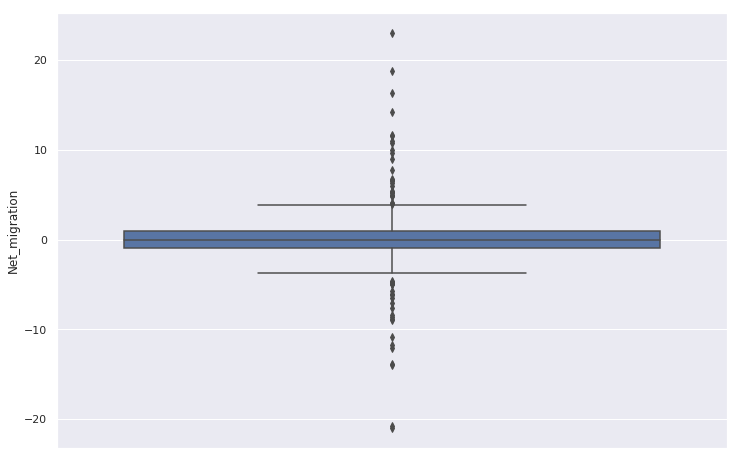

In [23]:
sns.boxplot(countries['Net_migration'],orient='v')

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [24]:
from sklearn.datasets import fetch_20newsgroups

In [25]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

In [26]:
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
def q6(newsgroup):
    #Instancia um objeto CountVectorizer 
    count_vect = CountVectorizer()
    
    # A variável 'count_vect_transf' fita e transforma os dados de 'newsgroup', resultando em uma matriz
    # esparsa em que cada coluna representa uma palavra única. Cada linha do texto, representa uma linha da
    # matriz. Assim, em cada linha da matriz há quantidade de determinada palavra encontrada naquela linha
    count_vect_transf = count_vect.fit_transform(newsgroup.data)
    
    # Encontrando a frequência para a palavra 'phone'
    # A variável phone_count é um subconjunto da variável 'count_vect_transf' apenas com a quantidade de valores
    # encontrados para a palavra 'phone' em cada linha
    phone_count = count_vect_transf[:,count_vect.vocabulary_['phone']]
    
    # Para encontrar a frequência total da palavra 'phone' em toda a variável 'newsgroup' 
    # (através dos 3 documentos que compõem a mesma), faz-se um somatório de todos os valores
    # existentes na variável 'tfidf_phone'
    return int(round(sum(phone_count.data),3))

In [32]:
q6(newsgroup)

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
def q7(newsgroup):
    #Instancia um objeto TfidfVectorizer 
    tfidf = TfidfVectorizer()
    
    # A variável 'tfidf_transf' fita e transforma os dados de 'newsgroup', resultando em uma matriz
    # com o valor TF-IDF de cada uma das palavras encontradas nos 3 documentos que fazem parte da
    # variável 'newsgroup'
    tfidf_transf = tfidf.fit_transform(newsgroup.data)
    
    # Encontrando TF-IDF para a palavra 'phone'
    # A variável tfidf_phone é um subconjunto da variável 'tfidf_transf' apenas para os valores de 
    # TF-IDF encontrados para a palavra 'phone' em suas ocorrências individuais..
    tfidf_phone = tfidf_transf[:,tfidf.vocabulary_['phone']]
    
    # Para encontrar o valor de TF-IDF para a palavra 'phone' em toda a variável 'newsgroup' 
    # (através dos 3 documentos que compõem a mesma), faz-se um somatório de todos os valores
    # existentes na variável 'tfidf_phone'
    return float(round(sum(tfidf_phone.data),3))

In [35]:
q7(newsgroup)

8.888